<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-the-data" data-toc-modified-id="Load-the-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load the data</a></span></li><li><span><a href="#Visualize-the-data" data-toc-modified-id="Visualize-the-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Visualize the data</a></span><ul class="toc-item"><li><span><a href="#add-label-mask" data-toc-modified-id="add-label-mask-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>add label mask</a></span></li></ul></li><li><span><a href="#Train-a-model" data-toc-modified-id="Train-a-model-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Train a model</a></span><ul class="toc-item"><li><span><a href="#dafine-X,y" data-toc-modified-id="dafine-X,y-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>dafine X,y</a></span></li><li><span><a href="#establish-the-model-and-train-it" data-toc-modified-id="establish-the-model-and-train-it-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>establish the model and train it</a></span></li><li><span><a href="#show-the-predicted-result-and-its-accuracy" data-toc-modified-id="show-the-predicted-result-and-its-accuracy-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>show the predicted result and its accuracy</a></span></li><li><span><a href="#test-on-the-new-data" data-toc-modified-id="test-on-the-new-data-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>test on the new data</a></span></li><li><span><a href="#visualize-the-decision-boundary" data-toc-modified-id="visualize-the-decision-boundary-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>visualize the decision boundary</a></span></li></ul></li><li><span><a href="#Make-curved-decision-boundary-and-Trian-a-new-model" data-toc-modified-id="Make-curved-decision-boundary-and-Trian-a-new-model-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Make curved decision boundary and Trian a new model</a></span><ul class="toc-item"><li><span><a href="#create-new-data" data-toc-modified-id="create-new-data-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>create new data</a></span></li><li><span><a href="#create-a-new-data-frame" data-toc-modified-id="create-a-new-data-frame-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>create a new data frame</a></span></li><li><span><a href="#establish-new-model-and-train" data-toc-modified-id="establish-new-model-and-train-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>establish new model and train</a></span></li><li><span><a href="#evaluate-predictions" data-toc-modified-id="evaluate-predictions-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>evaluate predictions</a></span></li><li><span><a href="#visualize-the-decision-boudary" data-toc-modified-id="visualize-the-decision-boudary-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>visualize the decision boudary</a></span></li></ul></li></ul></div>

# Logiestic Regression - Exam 

**任务:**

基于examdata.csv数据，建立逻辑回归模型  
预测Exam1 = 75, Exam2 = 60时，该同学在Exam3是 passed or failed;  
建立二阶边界，提高模型准确度  

## Load the data

In [2]:
import pandas as pd
import numpy as np
data = pd.read_csv('examdata.csv')
data.head()

,Exam1,Exam2,Pass
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


## Visualize the data

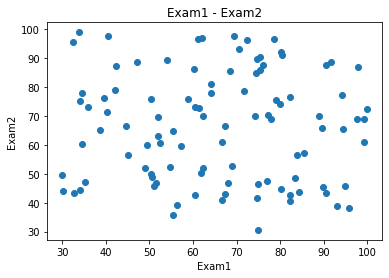

In [5]:
%matplotlib inline
from matplotlib import pyplot as plt

fig1 = plt.figure(figsize=(6,4))
plt.scatter(data.Exam1, data.Exam2)
plt.title('Exam1 - Exam2')
plt.xlabel('Exam1')
plt.ylabel('Exam2')
plt.show()

### add label mask

In [7]:
mask = data.Pass==1
mask.head()

0    False
1    False
2    False
3     True
4     True
Name: Pass, dtype: bool

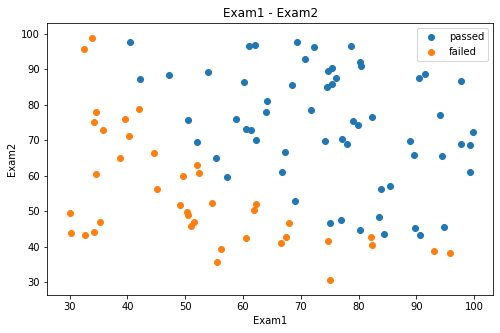

In [16]:
fig2 = plt.figure(figsize=(8,5))
passed = plt.scatter(data.Exam1[mask],data.Exam2[mask])
failed = plt.scatter(data.Exam1[~mask], data.Exam2[~mask])
plt.title('Exam1 - Exam2')
plt.xlabel('Exam1')
plt.ylabel('Exam2')
plt.legend((passed,failed),('passed','failed'))
plt.show()

## Train a model 

### dafine X,y

In [20]:
X = data.drop(['Pass'],axis=1)
y = data.Pass
X1 = data.Exam1
X2 = data.Exam2
X2.head()

0    78.024693
1    43.894998
2    72.902198
3    86.308552
4    75.344376
Name: Exam2, dtype: float64

### establish the model and train it

In [23]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X,y)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

### show the predicted result and its accuracy

In [25]:
y_predicted = LR.predict(X)


In [26]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y, y_predicted)
accuracy

0.87

### test on the new data

In [27]:
#exam1=70,exam2=65
y_test = LR.predict([[70,65]])
print('passed' if y_test ==1 else 'failed')

passed


### visualize the decision boundary

In [28]:
LR.coef_

array([[0.03844482, 0.03101855]])

In [11]:
LR.intercept_

array([-25.05219314])

Desicion boudary： $\theta_0 + \theta_1 X_1 + \theta_2 X_2 = 0$

In [30]:
theta0 = LR.intercept_
theta1 = LR.coef_[0][0]
theta2 = LR.coef_[0][1]
theta0, theta1, theta2

(array([-3.89977794]), 0.03844481555459429, 0.03101854556230915)

In [33]:
X_new = -(theta0 +theta1*X1)/theta2
X_new.head()

0    82.811031
1    88.186306
2    81.294299
3    51.132927
4    27.769806
Name: Exam1, dtype: float64

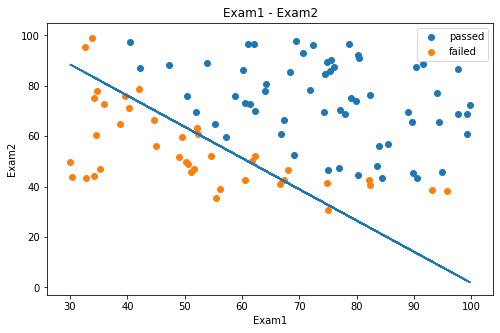

In [37]:
fig3 = plt.figure(figsize=(8,5))
plt.plot(X1,X_new)
passed = plt.scatter(data.Exam1[mask],data.Exam2[mask])
failed = plt.scatter(data.Exam1[~mask], data.Exam2[~mask])
plt.title('Exam1 - Exam2')
plt.xlabel('Exam1')
plt.ylabel('Exam2')
plt.legend((passed,failed),('passed','failed'))
plt.show()

边界函数： $\theta_0 + \theta_1 X_1 + \theta_2 X_2 = 0$

## Make curved decision boundary and Trian a new model

Decision boudary ：$\theta_0 + \theta_1 X_1 + \theta_2 X_2+ \theta_3 X_1^2 + \theta_4 X_2^2 + \theta_5 X_1 X_2 = 0$

### create new data

In [38]:
X1_2 = X1*X1
X2_2 = X2*X2
X1_X2 = X1*X2

### create a new data frame

In [40]:
X_new = {'X1':X1, 'X2':X2, 'X1_2':X1_2, 'X2_2':X2_2, 'X1_X2':X1_X2}
X_new = pd.DataFrame(X_new)
X_new.head()

,X1,X2,X1_2,X2_2,X1_X2
0,34.623660,78.024693,1198.797805,6087.852690,2701.500406
1,30.286711,43.894998,917.284849,1926.770807,1329.435094
2,35.847409,72.902198,1285.036716,5314.730478,2613.354893
3,60.182599,86.308552,3621.945269,7449.166166,5194.273015
4,79.032736,75.344376,6246.173368,5676.775061,5954.672216


### establish new model and train

In [41]:
LR2 = LogisticRegression()
LR2.fit(X_new,y)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

### evaluate predictions

In [42]:
y2_predicted = LR2.predict(X_new)
accuracy2 = accuracy_score(y, y2_predicted)
accuracy2

1.0

### visualize the decision boudary


二阶边界函数：$\theta_0 + \theta_1 X_1 + \theta_2 X_2+ \theta_3 X_1^2 + \theta_4 X_2^2 + \theta_5 X_1 X_2 = 0$

$\theta_4 X_2^2 + (\theta_5 X_1++ \theta_2) X_2 + (\theta_0 + \theta_1 X_1 + \theta_3 X_1^2)=0$

$a x^2 + b x + c=0: x1 = (-b+(b^2-4ac)^.5)/2a,x1 = (-b-(b^2-4ac)^.5)/2a$



In [49]:
X1_new = X1.sort_values()

In [45]:
theta0 = LR2.intercept_
theta1,theta2,theta3,theta4,theta5 = LR2.coef_[0][0],LR2.coef_[0][1],LR2.coef_[0][2],LR2.coef_[0][3],LR2.coef_[0][4]
a = theta4
b = theta5*X1_new+theta2
c = theta0+theta1*X1_new+theta3*X1_new*X1_new
X2_new_boundary = (-b+np.sqrt(b*b-4*a*c))/(2*a)


63    140.716864
1     139.106955
57    124.212217
70    123.343057
36    116.563412
Name: Exam1, dtype: float64

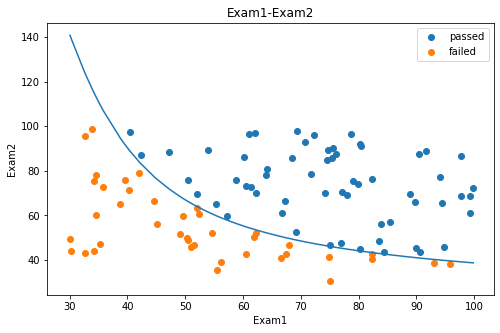

In [48]:
fig5 = plt.figure(figsize=(8,5))
passed=plt.scatter(data.loc[:,'Exam1'][mask],data.loc[:,'Exam2'][mask])
failed=plt.scatter(data.loc[:,'Exam1'][~mask],data.loc[:,'Exam2'][~mask])
plt.plot(X1_new,X2_new_boundary)
plt.title('Exam1-Exam2')
plt.xlabel('Exam1')
plt.ylabel('Exam2')
plt.legend((passed,failed),('passed','failed'))
plt.show()
